#Heart Disease Predictor

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [51]:
data=pd.read_csv('/content/drive/MyDrive/healthcare/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

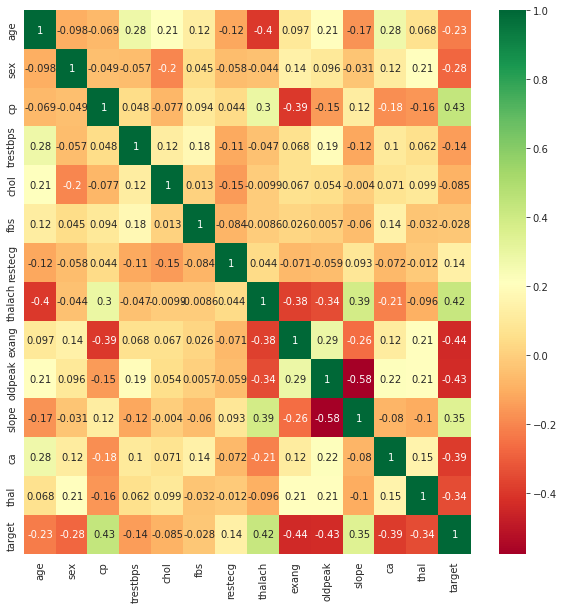

In [53]:
correlation=data.corr()
top_corr_feature=correlation.index
plt.figure(figsize=(10,10))

#plot the heatmap
g=sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap='RdYlGn')
plt.show()

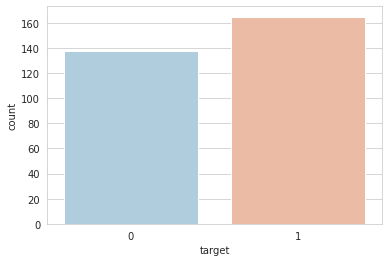

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')
plt.show()

In [55]:
dataset=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
standardscaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
data[columns_to_scale]=standardscaler.fit_transform(dataset[columns_to_scale])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [56]:
y=dataset['target']
X=dataset.drop(['target'],axis=1)

In [57]:
knn_score=[]
for k in range(1,21):
  knn_classifier=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn_classifier,X,y,cv=10)
  knn_score.append(scores.mean())

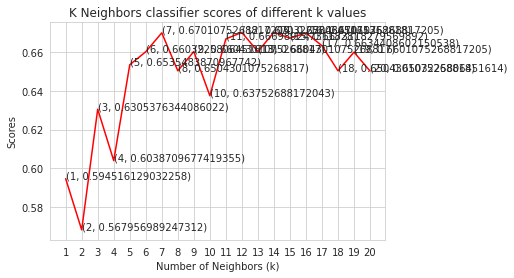

In [58]:
plt.plot([k for k in range(1,21)],knn_score,color='red')
for i in range(1,21):
  plt.text(i,knn_score[i-1],(i,knn_score[i-1]))

plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Scores')
plt.title('K Neighbors classifier scores of different k values')
plt.show()

In [59]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.6703225806451613